# **Title of Project**

>
Startup Profit Prediction


-------------

## **Objective**

Predict the profit of a startup based on how much it invests in R&D, administration, marketing, and in which region it operates.

## **Data Source**

https://github.com/YBIFoundation/Dataset/blob/main/50StartupProfit.csv

## **Import Library**

In [31]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

## **Import Data**

In [32]:
# load the dataset
df= pd.read_csv('https://raw.githubusercontent.com/YBIFoundation/Dataset/refs/heads/main/50StartupProfit.csv')

print("First 10 rows:")
display(df.head(10))

print("\nColumn names:")
print(df.columns.tolist())

First 10 rows:


,Region,Profit,R&D Spend,Administration,Marketing Spend
0,Region3,192262,165350,136898,471785
1,Region1,191793,162598,151378,443899
2,Region2,191051,153442,101146,407935
3,Region3,182902,144373,118672,383200
4,Region2,166188,142108,91392,366169
5,Region3,156992,131877,99815,362862
6,Region1,156123,134616,147199,127717
7,Region2,155753,130299,145531,323877
8,Region3,152212,120543,148719,311614
9,Region1,149760,123335,108680,304982



Column names:
['Region', 'Profit', 'R&D Spend', 'Administration', 'Marketing Spend']


## **Describe Data**

In [33]:
# quick stats
print("Info:")
df.info()

print("\nDescribe (numeric):")
display(df.describe())

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Region           50 non-null     object
 1   Profit           50 non-null     int64 
 2   R&D Spend        50 non-null     int64 
 3   Administration   50 non-null     int64 
 4   Marketing Spend  50 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.1+ KB

Describe (numeric):


,Profit,R&D Spend,Administration,Marketing Spend
count,50.000000,50.000000,50.000000,50.000000
mean,112013.100000,73722.080000,121345.160000,211025.580000
std,40306.158254,45902.308885,28017.769943,122290.351325
min,14682.000000,0.000000,51284.000000,0.000000
25%,90139.750000,39936.750000,103731.500000,129300.500000
50%,107979.000000,73051.500000,122700.000000,212716.500000
75%,139766.500000,101603.500000,144842.500000,299469.750000
max,192262.000000,165350.000000,182646.000000,471785.000000


## **Data Visualization**

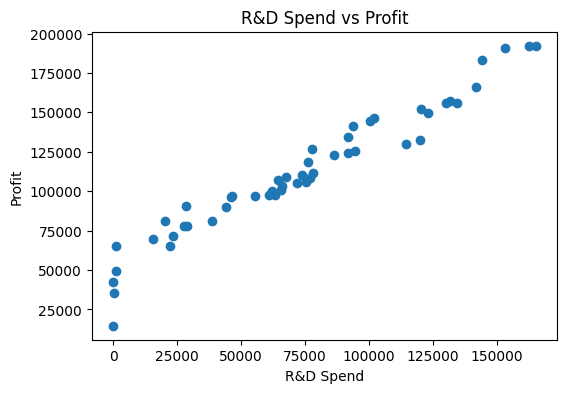

In [34]:
# Plot the spend vs profit graph
plt.figure(figsize=(6,4))
plt.scatter(df["R&D Spend"], df["Profit"])
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.title("R&D Spend vs Profit")
plt.show()


## **Data Preprocessing**

In [35]:
# Data Preprocessing

# Check categorical columns
df.dtypes

X = df.drop("Profit", axis=1)
y = df["Profit"]

# Convert categorical columns to numeric
X = pd.get_dummies(df, drop_first=True)

print("After Encoding:")
print(X.head())


After Encoding:
   Profit  R&D Spend  Administration  Marketing Spend  Region_Region2  \
0  192262     165350          136898           471785           False   
1  191793     162598          151378           443899           False   
2  191051     153442          101146           407935            True   
3  182902     144373          118672           383200           False   
4  166188     142108           91392           366169            True   

   Region_Region3  
0            True  
1           False  
2           False  
3            True  
4           False  


## **Define Target Variable (y) and Feature Variables (X)**

In [36]:
print("Features:\n", X.head())
print("\nTarget:\n", y.head())


Features:
    Profit  R&D Spend  Administration  Marketing Spend  Region_Region2  \
0  192262     165350          136898           471785           False   
1  191793     162598          151378           443899           False   
2  191051     153442          101146           407935            True   
3  182902     144373          118672           383200           False   
4  166188     142108           91392           366169            True   

   Region_Region3  
0            True  
1           False  
2           False  
3            True  
4           False  

Target:
 0    192262
1    191793
2    191051
3    182902
4    166188
Name: Profit, dtype: int64


## **Train Test Split**

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **Modeling**

In [38]:
# using linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## **Model Evaluation**

In [40]:
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

print("Mean absolute percentage error: ", mean_absolute_percentage_error(y_test,y_pred))

print("Mean squared error: ", mean_squared_error(y_test,y_pred))

MAE: 2.255546860396862e-11
R2 Score: 1.0
Mean absolute percentage error:  3.239284356615972e-16
Mean squared error:  8.099752558119247e-22


## **Prediction**

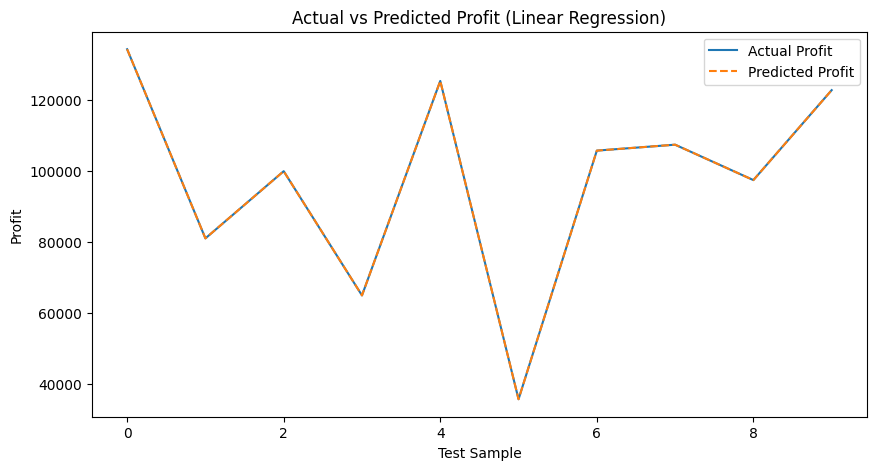

In [41]:
y_pred = model.predict(X_test)

# Plot Actual vs Predicted Profit

plt.figure(figsize=(10,5))
plt.plot(range(len(y_test)), y_test.values, label="Actual Profit")
plt.plot(range(len(y_test)), y_pred, label="Predicted Profit", linestyle="--")
plt.xlabel("Test Sample")
plt.ylabel("Profit")
plt.title("Actual vs Predicted Profit (Linear Regression)")
plt.legend()
plt.show()

## **Explaination**

The model used in this project is Linear Regression. Linear Regression finds the best-fit straight line that connects input features (R&D, Admin, Marketing, State) to the output (Profit).
It identifies how much each factor contributes to profit.
R&D Spend usually has the strongest positive impact.